In [173]:
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

#statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations



In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import io
import datetime
import matplotlib.lines as mlines
import statsmodels.formula.api as smf
from statsmodels.graphics import tsaplots
import yfinance as yf

In [1]:
pip install pandoc

     |████████████████████████████████| 127 kB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 11.5 MB/s eta 0:00:01
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33280 sha256=a258769f7b4ddbd720747191ba409c43e0b5b994db1c3a4abf47a475383d0068
  Stored in directory: /Users/mallikachandra/Library/Caches/pip/wheels/69/e6/a1/1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


In [259]:
df= pd.read_csv('DCOILWTICO.csv', parse_dates = True, index_col = 0)
df = df[df.DCOILWTICO !='.'].resample('W').last().astype('float')

In [260]:
df.columns = ['crude']

In [261]:
df['crude'] = pd.to_numeric(df['crude'], errors='coerce')
df

,crude
DATE,
1990-01-07,23.07
1990-01-14,23.17
1990-01-21,23.70
1990-01-28,22.56
1990-02-04,23.04
...,...
2023-04-16,82.58
2023-04-23,77.86
2023-04-30,76.78


## Splitting into Train and Test

In [262]:
# Splitting the series into train and test dataframes
train = df.loc[df.index < '2021-09-01']
test = df.loc[df.index >= '2021-10-01']



In [267]:
df.loc[df.index < '2021-10-01']

,crude
DATE,
1990-01-07,23.07
1990-01-14,23.17
1990-01-21,23.70
1990-01-28,22.56
1990-02-04,23.04
...,...
2021-08-29,68.84
2021-09-05,69.34
2021-09-12,69.82


In [266]:
%%R
train

Time Series:
Start = c(1990, 1) 
End = c(2021, 9) 
Frequency = 52 
   [1]  23.07  23.17  23.70  22.56  23.04  21.82  22.46  21.13  21.36  20.42
  [11]  20.09  20.28  20.34  19.15  17.76  17.90  18.57  17.98  18.96  18.78
  [21]  16.12  17.51  16.78  16.64  16.50  17.05  16.49  18.37  19.61  20.07
  [31]  23.79  26.38  28.65  31.10  27.45  30.09  31.79  36.21  39.53  37.87
  [41]  39.42  33.82  33.03  33.95  33.91  29.91  32.35  29.08  26.61  26.60
  [51]  27.08  27.58  24.88  27.43  20.05  24.15  21.33  21.78  20.73  17.43
  [61]  19.43  19.34  19.88  19.88  19.63  20.03  21.54  21.16  21.28  21.43
  [71]  21.25  21.19  21.04  21.16  20.28  19.70  20.10  20.56  20.91  21.74
  [81]  22.16  21.48  21.35  21.64  21.29  21.78  22.28  21.56  21.71  22.02
  [91]  22.42  22.64  23.19  24.12  23.18  23.85  23.00  22.79  21.85  21.48
 [101]  19.87  20.09  18.28  18.82  19.22  18.26  19.11  18.75  18.93  19.91
 [111]  19.42  18.60  18.69  18.53  19.16  18.78  19.19  20.25  20.45  20.25
 [121]  2

In [268]:
%%R
test

Time Series:
Start = c(2021, 10) 
End = c(2023, 25) 
Frequency = 52 
  [1]  52.16  56.80  59.50  59.12  61.55  66.08  65.59  61.43  60.93  61.41
 [11]  59.29  63.16  62.18  63.50  64.96  65.32  63.61  66.31  69.57  71.00
 [21]  71.64  74.21  75.37  74.56  71.76  72.24  73.93  68.26  68.36  62.25
 [31]  68.84  69.34  69.82  72.09  74.18  76.01  79.55  82.39  84.53  83.50
 [41]  81.25  80.87  76.11  78.32  66.39  71.71  70.93  73.89  75.33  79.00
 [51]  83.82  85.16  87.67  92.27  93.10  91.26  91.68 115.77 109.31 104.69
 [61] 116.20  99.32  98.35 106.84 102.86 104.59 109.72 110.52 112.63 114.96
 [71] 118.97 120.73 109.56 109.07 110.30 106.78  99.59  97.71 101.31  91.77
 [81]  94.86  93.55  93.63  87.29  87.27  85.57  79.07  79.91  93.07  86.10
 [91]  85.47  87.85  92.58  89.14  80.07  76.45  79.86  71.05  74.19  79.57
[101]  80.16  73.77  79.90  81.27  79.73  73.40  79.74  76.31  76.19  79.62
[111]  76.55  66.61  69.22  75.68  80.70  82.58  77.86  76.78  71.32  73.13


In [263]:
train['crude'] = pd.to_numeric(train['crude'], errors='coerce')
test['crude'] = pd.to_numeric(test['crude'], errors='coerce')

In [124]:
ets_model=sm.tsa.statespace.ExponentialSmoothing(train,
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=False).fit()

fc_model = ets_model.forecast(len(test)) 

test["ETS"]=fc_model

/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/exponential_smoothing.py:161: RuntimeWarning: ExponentialSmoothing should not be used with seasonal terms. It has a serious bug that has not been fixed. Instead use ETSModel.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41842D+00    |proj g|=  5.18314D-01

At iterate    5    f=  2.46979D+00    |proj g|=  6.67826D-03

At iterate   10    f=  2.45813D+00    |proj g|=  1.10806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   5.752D-06   2.458D+00
  F =   2.4576980246744435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


### Forecasting

<Figure size 1080x720 with 0 Axes>

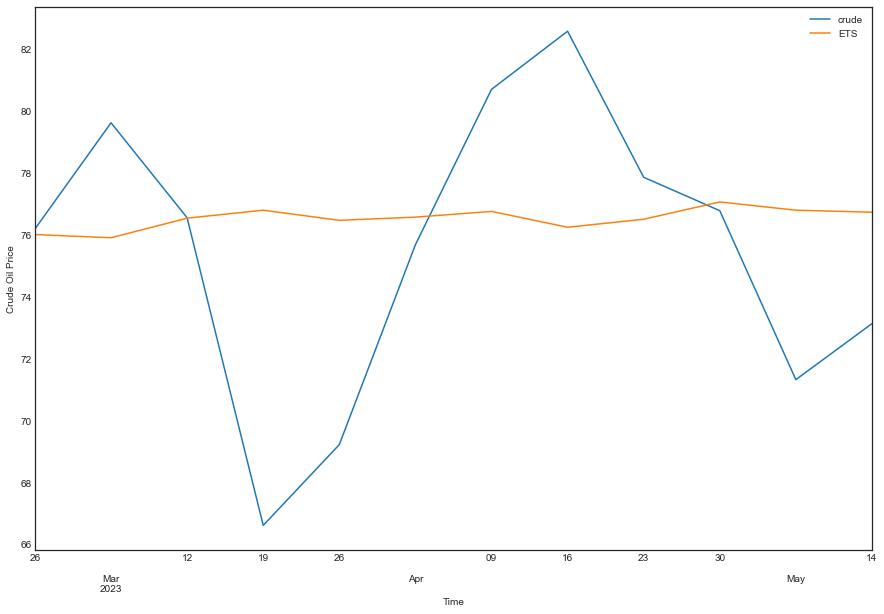

In [126]:
# Plotting the graph with increased figsize
plt.figure(figsize=(15, 10))

# Plotting the test set
test.plot(figsize=(15, 10))

# Setting the labels for x-axis and y-axis
plt.xlabel('Time')
plt.ylabel('Crude Oil Price')

# Displaying the plot
plt.show()


### MAPE

In [127]:
mape_ets = 100 * np.mean(np.abs(test['crude']- test['ETS']) / test['crude'])

In [128]:
print(f"MAPE: {mape_ets:.2f}%")

MAPE: 4.93%


### RMSE

In [129]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test["crude"], test["ETS"]))

# Print the RMSE
print("RMSE:", rmse)


RMSE: 4.756462587164766


## ~what other metrics??

## Holts Winters

In [180]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [181]:
hw_model = HWES(train, seasonal_periods=12, trend='add', seasonal='mul')
hw_fitted = hw_model.fit()

In [159]:
print(hw_fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    crude   No. Observations:                 1729
Model:             ExponentialSmoothing   SSE                          13329.699
Optimized:                         True   AIC                           3563.398
Trend:                         Additive   BIC                           3650.683
Seasonal:                Multiplicative   AICC                          3563.798
Seasonal Periods:                    12   Date:                 Thu, 01 Jun 2023
Box-Cox:                          False   Time:                         18:13:16
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9614263                alpha                 True
smoothing_trend          

In [99]:
#hw_model = HWES(train, seasonal_periods=12, trend='mul', seasonal='add')
#hw_fitted = hw_model.fit()

/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [100]:
#print(hw_fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    crude   No. Observations:                 1392
Model:             ExponentialSmoothing   SSE                           8874.901
Optimized:                         True   AIC                           2610.660
Trend:                   Multiplicative   BIC                           2694.476
Seasonal:                      Additive   AICC                          2611.158
Seasonal Periods:                    12   Date:                 Wed, 31 May 2023
Box-Cox:                          False   Time:                         18:54:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9906666                alpha                 True
smoothing_trend          

### Forecasting

In [182]:
hw_forecast = hw_fitted.forecast(len(test))

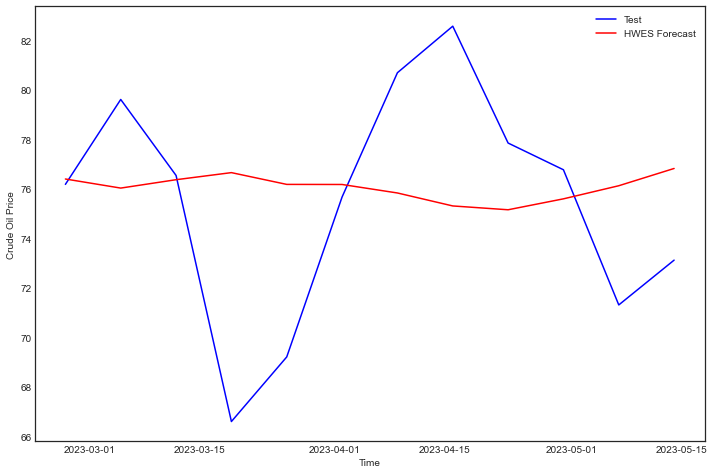

In [133]:
# Plotting the test set and forecast on the same graph
plt.figure(figsize=(12, 8))
plt.plot(test.index, test['crude'], color='blue', label='Test')
plt.plot(test.index, hw_forecast, color='red', label='HWES Forecast')
plt.xlabel('Time')
plt.ylabel('Crude Oil Price')
plt.legend()
plt.show()


In [134]:
mape_hw = 100 * np.mean(np.abs(test['crude'] - hw_forecast) / test['crude'])
print(f"MAPE: {mape_hw:.2f}%")

MAPE: 5.20%


### RMSE

In [135]:
rmse = np.sqrt(mean_squared_error(test["crude"], hw_forecast))

# Print the RMSE
print(f"RMSE: {rmse:.2f}%")


RMSE: 4.87%


## Auto Arima

In [136]:
import pmdarima as pm
smodel = pm.auto_arima(train['crude'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic


/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=8.98 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=12990.724, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9138.027, Time=2.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=11408.633, Time=2.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=12991.011, Time=0.20 sec


/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=9530.903, Time=0.55 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=8915.881, Time=13.36 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=28.48 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=8.93 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=12917.397, Time=4.86 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=8917.672, Time=15.95 sec


/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=8917.682, Time=21.92 sec


/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=11353.047, Time=17.31 sec


/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=8919.781, Time=23.34 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=8913.928, Time=3.14 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=9136.087, Time=0.99 sec
 ARIMA(1,0,0)(2,1,1)[12]             : AIC=inf, Time=15.38 sec
 ARIMA(1,0,0)(1,1,1)[12]             : AIC=inf, Time=6.10 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=12918.858, Time=1.03 sec
 ARIMA(2,0,0)(2,1,0)[12]             : AIC=8915.717, Time=2.40 sec


/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,1,0)[12]             : AIC=8915.727, Time=2.58 sec


/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(2,1,0)[12]             : AIC=11354.197, Time=3.74 sec


/Users/mallikachandra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,1,0)[12]             : AIC=8917.827, Time=4.18 sec

Best model:  ARIMA(1,0,0)(2,1,0)[12]          
Total fit time: 188.619 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1729
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -4452.964
Date:                            Wed, 31 May 2023   AIC                           8913.928
Time:                                    19:10:52   BIC                           8935.722
Sample:                                01-07-1990   HQIC                          8921.992
                                     - 02-19-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9684      0.003    294.286      0.000       0.962       0.975
ar.S.L12      -0.6284      0.016    -38.532      0.000      -0.660      -0.596
ar.S.L24      -0.3593      0.016    -22.672      0.000      -0.390      -0.328
sigma2        10.4264      0.183     56.833      0.000      10.067      10.786
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              2435.69
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               7.90   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecasting

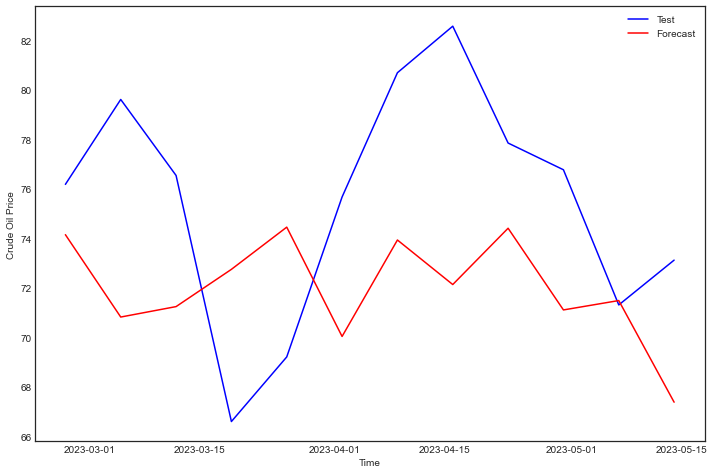

In [183]:
# Forecasting using the SARIMA model
n_forecast = len(test)
forecast, conf_int = smodel.predict(n_forecast, return_conf_int=True)

# Plotting the forecast and test set on the same graph
plt.figure(figsize=(12, 8))
plt.plot(test.index, test['crude'], color='blue', label='Test')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.xlabel('Time')
plt.ylabel('Crude Oil Price')
plt.legend()
plt.show()


In [184]:
mape_n = 100 * np.mean(np.abs(test['crude'] - forecast) / test['crude'])
print(f"MAPE: {mape_n:.2f}%")

MAPE: 7.15%


### RMSE

In [146]:
rmse = np.sqrt(mean_squared_error(test["crude"], forecast))

# Print the RMSE
print(f"RMSE: {rmse:.2f}%")


RMSE: 6.04%


## Combining Models

In [194]:
train['hw'] = hw_fitted.fittedvalues

In [196]:
train['auto_arima'] = smodel.predict_in_sample()

In [186]:
test['hw'] = hw_forecast

In [188]:
test['auto_arima'] = forecast

In [199]:
combination_1 = smf.ols('crude ~ auto_arima + hw', data = train).fit()
combination_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crude   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 9.675e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:36:30   Log-Likelihood:                -4216.3
No. Observations:                1729   AIC:                             8439.
Df Residuals:                    1726   BIC:                             8455.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1932      0.132      1.469      0.142      -0.065       0.451
auto_arima    -0.0396      0.029     -1.387      0.165      -0.096       0.016
hw             1.0356      0.029     35.923      0.000       0.979       1.092
==============================================================================
Omnibus:                      307.730   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4734.836
Skew:                          -0.343   Prob(JB):                         0.00
Kurtosis:                      11.078   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
comb_forecast1 = combination_1.predict(test)

comb_forecast1

DATE
2023-02-26    76.381965
2023-03-05    76.133970
2023-03-12    76.467627
2023-03-19    76.704120
2023-03-26    76.144258
2023-04-02    76.315677
2023-04-09    75.805781
2023-04-16    75.334792
2023-04-23    75.084703
2023-04-30    75.672411
2023-05-07    76.205652
2023-05-14    77.090658
dtype: float64

In [202]:
comb_forecast2 = (test['auto_arima'] + test['hw'])/2

In [203]:
# take the mean across columns, not down the rows
# this will give you the average forecast over each forecast horizon
test[['auto_arima', 'hw']].mean(axis = 1)

DATE
2023-02-26    75.282539
2023-03-05    73.435605
2023-03-12    73.815571
2023-03-19    74.711032
2023-03-26    75.325643
2023-04-02    73.116269
2023-04-09    74.892699
2023-04-16    73.731272
2023-04-23    74.791185
2023-04-30    73.361900
2023-05-07    73.815943
2023-05-14    72.111867
Freq: W-SUN, dtype: float64

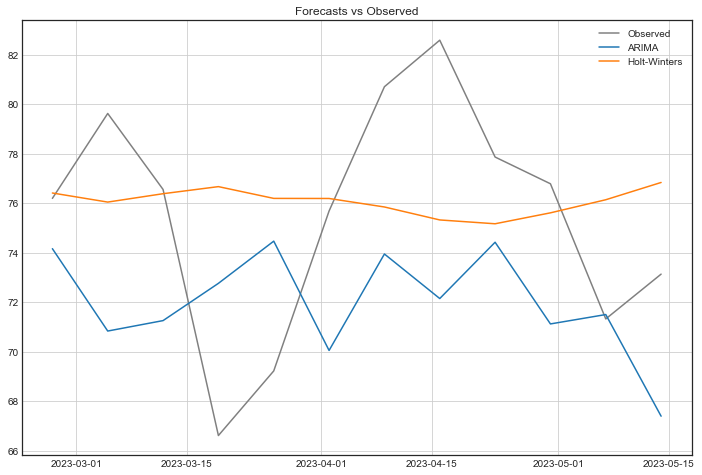

In [205]:
plt.figure(figsize = (12, 8))
plt.title('Forecasts vs Observed')
#plt.plot(train.crude[-100:], color = 'grey')
plt.plot(test.crude, color = 'grey')
#plt.plot(comb_forecast1, alpha = .5)
#plt.plot(comb_forecast2, alpha = .5)
plt.plot(test.auto_arima)
plt.plot(test.hw)




#plt.legend(['Observed','OLS Combination', 'Mean Combination', 'ARIMA', 'Holt-Winters'])
plt.legend(['Observed', 'ARIMA', 'Holt-Winters'])
plt.grid()

In [208]:
import warnings
warnings.filterwarnings('ignore')

from rpy2.robjects import pandas2ri
import rpy2.rinterface as rinterface
pandas2ri.activate()

%load_ext rpy2.ipython

In [222]:
%%R
install.packages('caret')

library(readr)
library(forecast)
library(xts)
library(ggplot2)
library(caret)
library(forecast)

# Provide the file path
file_path <- "df.csv"

# Load the CSV file into a data frame
df <- read.csv(file_path)


The downloaded binary packages are in
	/var/folders/32/6tv1kbfx7jn9vst5h14cqq4r0000gn/T//Rtmp9P8l7w/downloaded_packages


trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/contrib/4.2/caret_6.0-94.tgz'
Content type 'application/x-gzip' length 3580540 bytes (3.4 MB)
downloaded 3.4 MB



In [224]:
%%R
data_ts <- ts(df[,"DCOILWTICO"],frequency=52, start=c(1990,1))

In [229]:
%%R
#Split data into a training set and a test set
test <- window(data_ts, start = c(2021, 10))
train <- window(data_ts, end = c(2021, 9))

In [232]:
%%R
length(train)

[1] 1621


In [233]:
%%R
length(test)

[1] 120


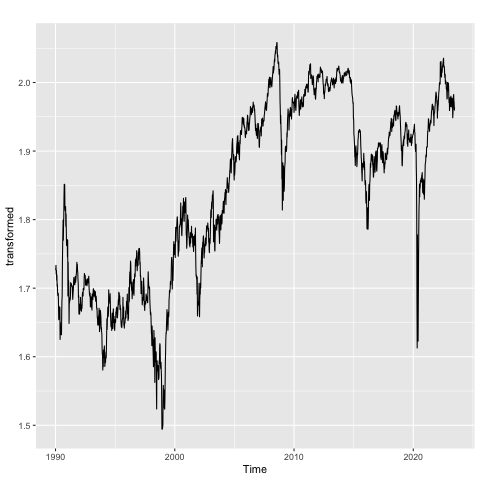

In [244]:
%%R
transformed <- BoxCox(data_ts, lambda= BoxCox.lambda(data_ts))
autoplot(transformed)

In [246]:
%%R
BoxCox.lambda(data_ts)

[1] -0.4282153


## --> talk about why we didnt transform and rejected it

## Seasonal Naïve

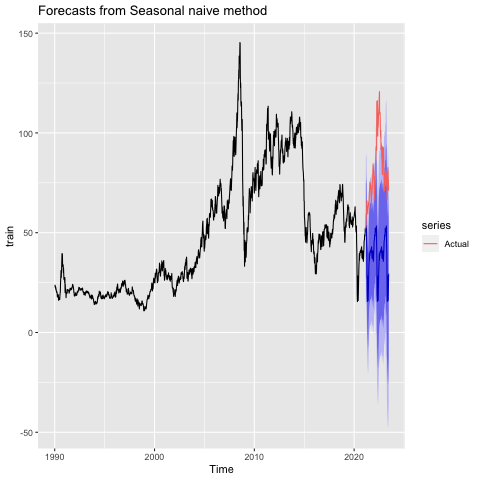

In [241]:
%%R
v_sn <- snaive(train, h = length(test))

autoplot(v_sn) + autolayer(test, series="Actual")
#+(ggtitle(" Seasonal Naive Model")+ xlab("Time")+ ylab("Price of Crude Oil")

## STL Decomposition

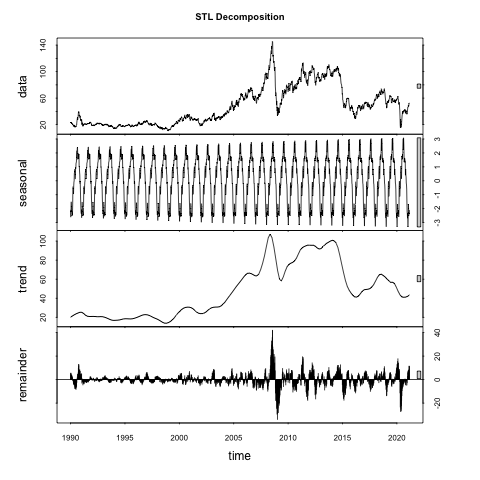

In [249]:
%%R
plot(stl(train, s.window = 52), main = "STL Decomposition")

## --> bad trend (non-linear); mild multiplicative seasonality - in holt winter hence will try both

## ETS Model

In addition: Warning messages:
1: In ets(train) :
  I can't handle data with frequency greater than 24. Seasonality will be ignored. Try stlf() if you need seasonal forecasts.
2: In ggplot2::geom_line(ggplot2::aes(x = .data[["timeVal"]], y = .data[["seriesVal"]],  :
  Ignoring unknown parameters: `PI`


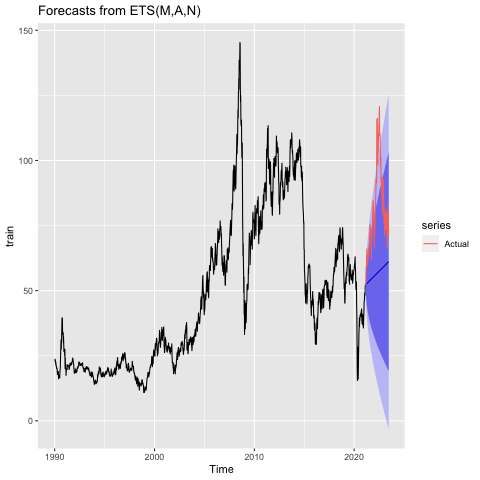

In [236]:
%%R
train.ets <- ets(train)
train.ets.fc<- forecast(train.ets, h=length(test))
autoplot(train.ets.fc) + autolayer(test, series="Actual", PI=FALSE)

## However, the ets function in the forecast package is designed to handle data with frequencies up to 24, meaning it can effectively handle data with seasonal patterns repeating within a cycle of up to 24 time periods.

In the case of weekly data with a frequency of 52, the ets function may not be the most appropriate choice. Instead, you can try using the stlf function, which is better suited for handling time series data with multiple seasonal patterns or frequencies greater than 24. The stlf function uses STL decomposition and loess smoothing to capture the seasonality and trend components, providing more accurate forecasts.

# --> talk about how it doesnt capture things other than seasonality

## ETS with STL

In [253]:
%%R
#v_ets_stl <- fit_ets_stl <- stlf(train, s.window = 52, h = length(test), method = "ets")

#autoplot(v_ets_stl, xlab = 'Time', ylab = 'Price of Crude Oil') + ggtitle("ETS Model with STL Decomposition")

NULL


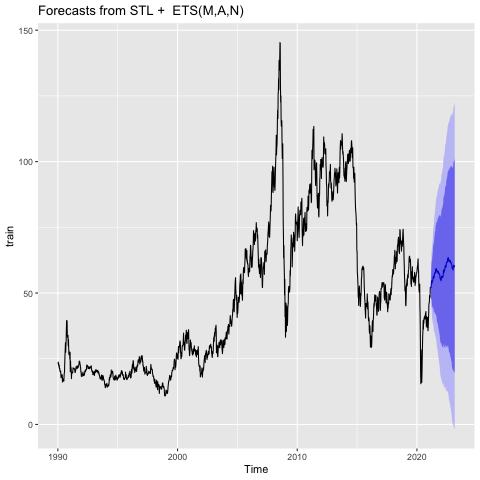

In [252]:
%%R
train.stlm <- stlm(train, s.window=52, method="ets")
stlm.fc <- forecast(train.stlm)
autoplot(stlm.fc)

## ARIMA

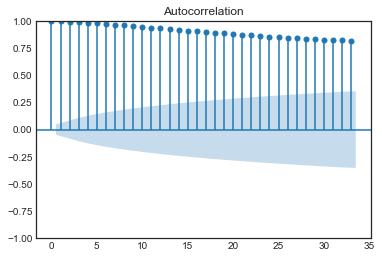

In [271]:
plot_acf(train);

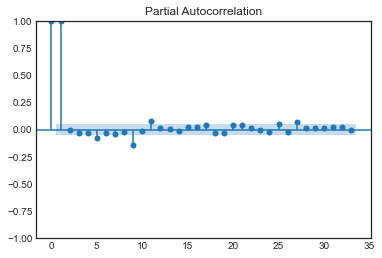

In [272]:
plot_pacf(train);

## ~~ AR(1)

In [275]:
%%R
arima_1 <- arima(train, order=c(1,0,0))


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 192.05, df = 103, p-value = 2.435e-07

Model df: 1.   Total lags used: 104



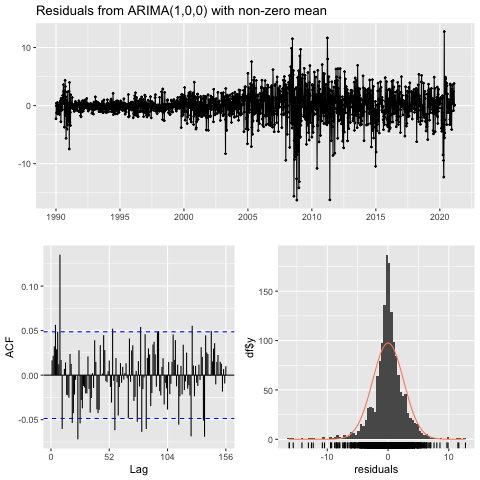

In [276]:
%%R
checkresiduals(arima_1)

## --> discuss how this is not white noise (Ljung Box Test) - hence trying out different arima models - see ACF and notice seasonality - hence need something to capture that


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(1,1,0)[52]
Q* = 442.83, df = 102, p-value < 2.2e-16

Model df: 2.   Total lags used: 104



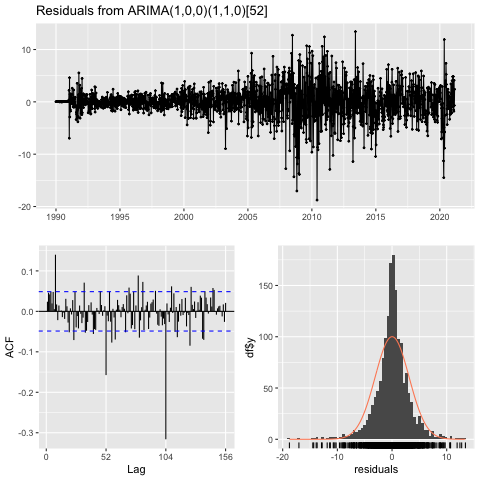

In [279]:
%%R
# AR(1) with seasonal(1) component
arima_2 <- arima(train, order=c(1,0,0), seasonal =list(order = c(1,1,0)))

checkresiduals(arima_2)


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,1)[52]
Q* = 195.03, df = 100, p-value = 4.22e-08

Model df: 4.   Total lags used: 104



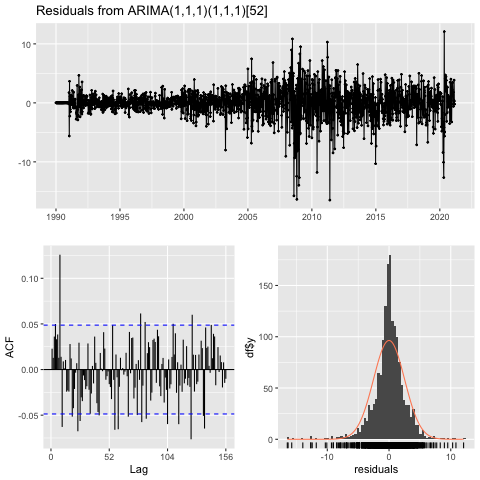

In [282]:
%%R
# AR(1) with seasonal(1) component
arima_3 <- arima(train, order=c(1,1,1), seasonal =list(order = c(1,1,1)))

checkresiduals(arima_3)

## combining stlf and ARIMA
By combining STL decomposition and ARIMA, you can capture the long-term trend, seasonal patterns, and residual autocorrelation in a time series. This allows for a more comprehensive modeling approach that considers various components and patterns within the data. The intuition is that the trend and seasonal components captured through STL decomposition help in modeling the overall structure of the series, while the ARIMA model captures any remaining dependencies or patterns in the residuals that are not accounted for by the trend and seasonal components.

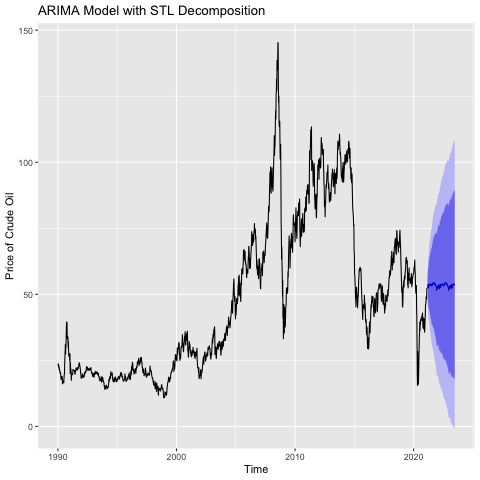

In [248]:
%%R
v_arima <- fit_arima_stl <- stlf(train, t.window = 52, s.window = "periodic", h = length(test), robust = TRUE, method = "arima")

autoplot(v_arima, xlab = 'Time', ylab = 'Price of Crude Oil') + ggtitle("ARIMA Model with STL Decomposition")

## Auto ARIMA

In [284]:
%%R
auto_arima <- auto.arima(train)

In [287]:
%%R
auto_arima

Series: train 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.8609  -0.8257
s.e.  0.0545   0.0592

sigma^2 = 6.562:  log likelihood = -3821.57
AIC=7649.14   AICc=7649.15   BIC=7665.31



	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 184.9, df = 102, p-value = 9.754e-07

Model df: 2.   Total lags used: 104



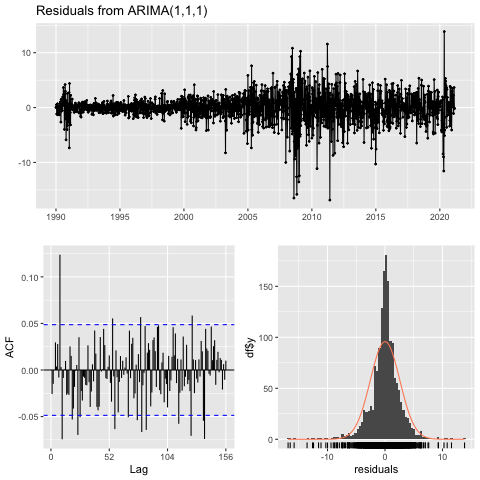

In [285]:
%%R
# AR(1) with seasonal(1) component
checkresiduals(auto_arima)

## --> seasonal ARIMA is not needed - arima is only able to capture this much and we could try to use its resids for arch/garch modeling as they depict cyles and volatility

## Holt Winters -- cannot do :( --- high frequency

## ETS with STL Decomposition on BoxCox Transformed

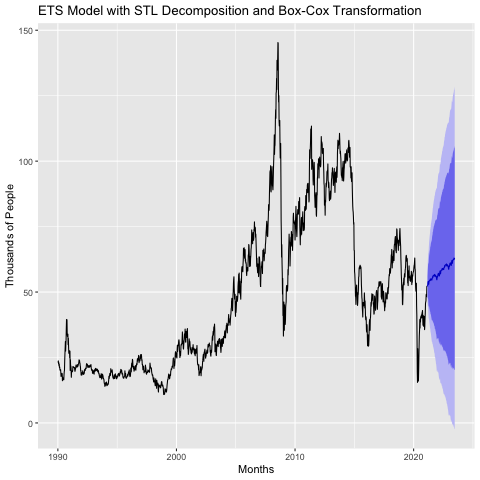

In [247]:
%%R
v_ets_box <- fit_ets_stl <- stlf(train, t.window = 52, s.window = "periodic", h = length(test), robust = TRUE, method = "ets")

autoplot(v_ets_box, xlab = 'Months', ylab = 'Thousands of People') + ggtitle("ETS Model with STL Decomposition and Box-Cox Transformation")

In [298]:
%%R
# model building

h <- length(test)
ARIMA <- forecast(auto.arima(train, lambda=0, biasadj=TRUE),
  h=h)
STL <- stlf(train, lambda=0, h=h, biasadj=TRUE)
NNAR <- forecast(nnetar(train), h=h)
TBATS <- forecast(tbats(train, biasadj=TRUE), h=h)
Combination <- (ARIMA[["mean"]] + 
  stlm.fc[["mean"]] + NNAR[["mean"]] + STL[["mean"]]+ TBATS[["mean"]])/5

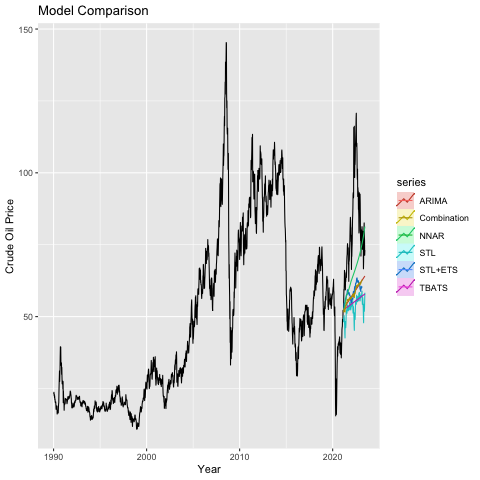

In [311]:
%%R
autoplot(data_ts) +
  autolayer(ARIMA, series="ARIMA", PI=FALSE) +
  autolayer(STL, series="STL", PI=FALSE) +
  autolayer(stlm.fc, series="STL+ETS", PI=FALSE) +
  autolayer(NNAR, series="NNAR", PI=FALSE) +
  autolayer(TBATS, series="TBATS", PI=FALSE) +
  autolayer(Combination, series="Combination") +
  xlab("Year") + ylab("Crude Oil Price") +
  ggtitle("Model Comparison")

In [300]:
%%R
c(STLM = accuracy(stlm.fc, data_ts)["Test set","RMSE"],
  ARIMA = accuracy(ARIMA, data_ts)["Test set","RMSE"],
  `STL-ETS` = accuracy(STL, data_ts)["Test set","RMSE"],
  NNAR = accuracy(NNAR, data_ts)["Test set","RMSE"],
  TBATS = accuracy(TBATS, data_ts)["Test set","RMSE"],
  Combination =
    accuracy(Combination, data_ts)["Test set","RMSE"])

       STLM       ARIMA     STL-ETS        NNAR       TBATS Combination 
   28.19674    27.42780    32.03962    21.64796    30.52618    29.02129 


In [301]:
%%R
Combination_2 <- (ARIMA[["mean"]] + NNAR[["mean"]])/2

In [304]:
%%R
c(Comibination_2 = accuracy(Combination_2, data_ts)["Test set","RMSE"])

Comibination_2 
      24.33552 


In [307]:
%%R
Combination_3 <- (STL[["mean"]] + NNAR[["mean"]] + ARIMA[["mean"]])/3

In [308]:
%%R
c(Comibination_3 = accuracy(Combination_3, data_ts)["Test set","RMSE"])

Comibination_3 
      26.75081 


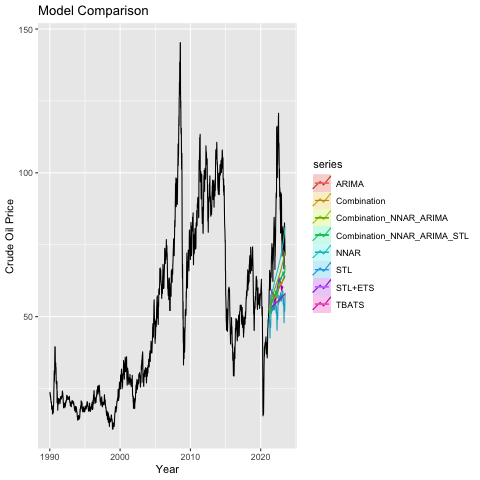

In [310]:
%%R
autoplot(data_ts) +
  autolayer(ARIMA, series="ARIMA", PI=FALSE) +
  autolayer(STL, series="STL", PI=FALSE) +
  autolayer(stlm.fc, series="STL+ETS", PI=FALSE) +
  autolayer(NNAR, series="NNAR", PI=FALSE) +
  autolayer(TBATS, series="TBATS", PI=FALSE) +
  autolayer(Combination, series="Combination") +
  autolayer(Combination_2, series="Combination_NNAR_ARIMA") +
  autolayer(Combination_3, series="Combination_NNAR_ARIMA_STL") +
  xlab("Year") + ylab("Crude Oil Price") +
  ggtitle("Model Comparison")

## Model Combinations

In [294]:
%%R
stlm.fc[["mean"]]

Time Series:
Start = c(2021, 10) 
End = c(2023, 9) 
Frequency = 52 
  [1] 51.92433 52.56532 54.22461 54.69206 54.43873 53.78211 54.39625 54.50981
  [9] 54.63924 55.83814 56.24653 56.42259 56.06072 55.68575 56.44893 57.45059
 [17] 57.30304 57.57410 57.83189 57.60656 58.54527 59.17189 58.44319 59.39556
 [25] 59.05988 58.50685 57.88851 58.03697 58.29497 58.38849 58.13789 58.36885
 [33] 57.42575 57.93388 57.58291 57.51493 57.17398 57.12594 56.87096 56.02728
 [41] 55.44612 55.35104 55.10848 55.56811 54.65086 55.70828 56.45218 56.18915
 [49] 55.78156 56.06824 56.07956 56.39915 56.01650 56.65749 58.31678 58.78422
 [57] 58.53090 57.87428 58.48842 58.60198 58.73140 59.93031 60.33870 60.51476
 [65] 60.15289 59.77792 60.54110 61.54276 61.39520 61.66627 61.92406 61.69873
 [73] 62.63744 63.26406 62.53536 63.48773 63.15205 62.59902 61.98068 62.12914
 [81] 62.38714 62.48066 62.23006 62.46102 61.51792 62.02605 61.67507 61.60710
 [89] 61.26615 61.21811 60.96313 60.11945 59.53829 59.44321 59.20065 59.66